In [163]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [190]:
with open("all_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment
0,Studio,2017,01,1457.0,2017,01,654100.0,49,31,28
1,Studio,2017,02,1482.5,2017,02,667000.0,43,30,26
2,Studio,2017,03,1275.0,2017,03,674400.0,43,27,23
3,Studio,2017,04,1385.0,2017,04,671400.0,35,27,24
4,Studio,2017,05,1595.0,2017,05,676000.0,33,25,21


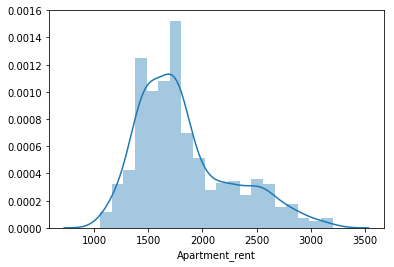

In [180]:
sns.distplot(merge_housing.Apartment_rent)

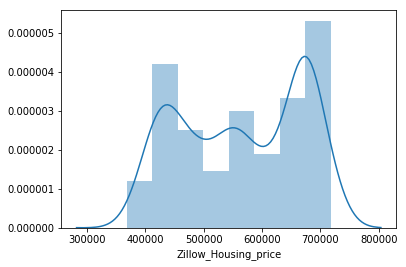

In [182]:
sns.distplot(merge_housing.Zillow_Housing_price.dropna())

ValueError: color kwarg must have one color per dataset

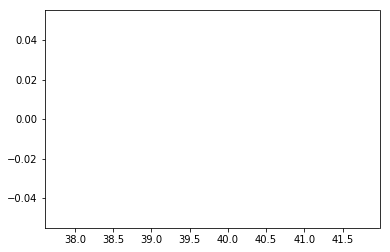

In [188]:
sns.distplot(merge_housing.Search_Count_SeattleRent.dropna())

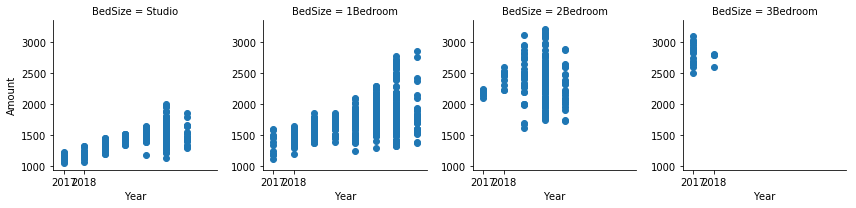

In [130]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(zillow_apartment_df, col='BedSize')
g.map(plt.scatter, 'Year', "Amount")



In [15]:
zillow_apartment_df['Year'].value_counts()

2017    440
2016    174
2015    120
2014     95
2018     76
2013     73
2012     57
2011     12
Name: Year, dtype: int64

In [16]:
zillow_apartment_df['BedSize'].value_counts()

1Bedroom    547
Studio      258
2Bedroom    216
3Bedroom     26
Name: BedSize, dtype: int64

In [17]:
df_apartment_bedSize = pd.get_dummies(zillow_apartment_df['BedSize'])
zillow_apartment_df_new = pd.concat([zillow_apartment_df, df_apartment_bedSize], axis=1)
zillow_apartment_df_new = zillow_apartment_df_new.drop(['RegionName','City','State','Metro','CountyName','SizeRank','BedSize'], axis=1)

In [18]:
# Get Average
zillow_apartment_grouped_df = zillow_apartment_df
zillow_apartment_grouped_df.groupby(['BedSize', 'Year', 'Month'], as_index=False)['Amount'].agg('mean')
zillow_apartment_grouped_df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,BedSize,Year,Month,Amount
70,98103,Seattle,WA,Seattle,King,71,Studio,2017,01,1457.0
70,98103,Seattle,WA,Seattle,King,71,Studio,2017,02,1482.5
70,98103,Seattle,WA,Seattle,King,71,Studio,2017,03,1275.0
70,98103,Seattle,WA,Seattle,King,71,Studio,2017,04,1385.0
70,98103,Seattle,WA,Seattle,King,71,Studio,2017,05,1595.0


In [19]:
studio_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == 'Studio']
oneBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '1Bedroom']
twoBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '2Bedroom']

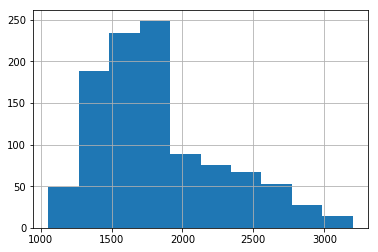

In [20]:
zillow_apartment_df['Amount'].hist()

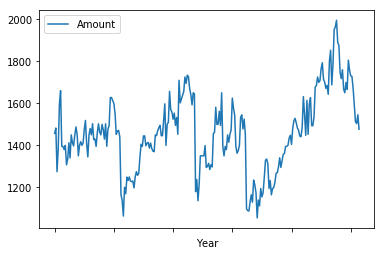

In [21]:
studio_df.plot.line(x='Year', y='Amount')

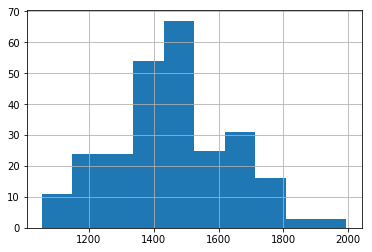

In [22]:
studio_df['Amount'].hist()

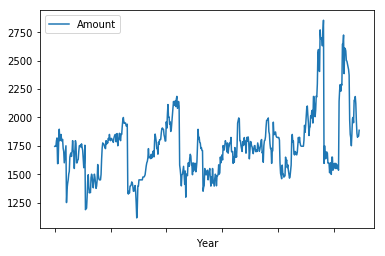

In [23]:
oneBed_df.plot.line(x='Year', y='Amount')

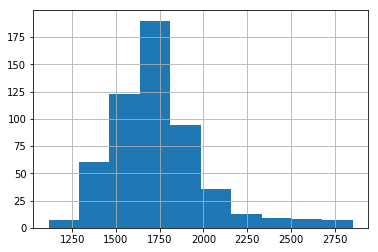

In [24]:
oneBed_df['Amount'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


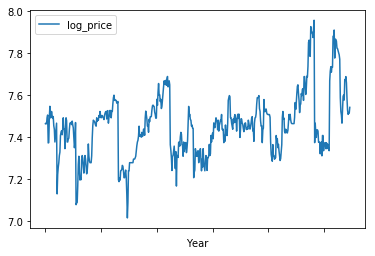

In [25]:
oneBed_df['log_price'] = np.log(oneBed_df['Amount'])
oneBed_df.plot.line(x='Year', y='log_price')

In [26]:
oneBed_df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,BedSize,Year,Month,Amount,log_price
112,98103,Seattle,WA,Seattle,King,113,1Bedroom,2016,06,1745.0,7.464510
112,98103,Seattle,WA,Seattle,King,113,1Bedroom,2016,07,1750.0,7.467371
112,98103,Seattle,WA,Seattle,King,113,1Bedroom,2016,08,1745.0,7.464510
112,98103,Seattle,WA,Seattle,King,113,1Bedroom,2016,09,1795.0,7.492760
112,98103,Seattle,WA,Seattle,King,113,1Bedroom,2016,10,1819.0,7.506042


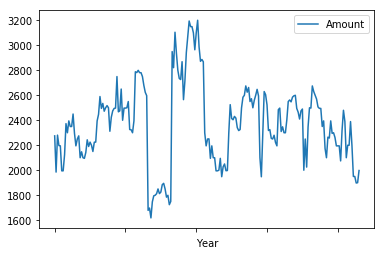

In [27]:
twoBed_df.plot.line(x='Year', y='Amount')

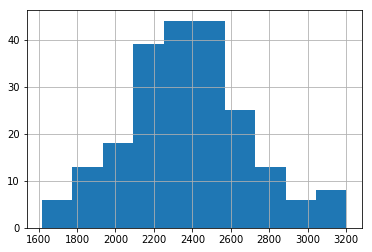

In [28]:
twoBed_df['Amount'].hist()

In [29]:
zillow_apartment_df_new.head()

,Year,Month,Amount,1Bedroom,2Bedroom,3Bedroom,Studio
70,2017,01,1457.0,0,0,0,1
70,2017,02,1482.5,0,0,0,1
70,2017,03,1275.0,0,0,0,1
70,2017,04,1385.0,0,0,0,1
70,2017,05,1595.0,0,0,0,1


In [30]:
len(zillow_apartment_df_new)

1047

In [31]:
zillow_apartment_df_new.shape

(1047, 7)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110212cc0>,
      dtype=object)

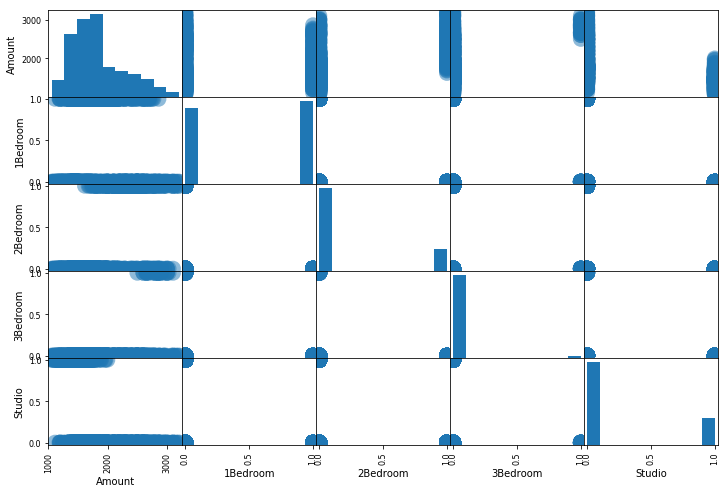

In [32]:
# Plot all of the variable-to-variable relations as scatterplots
pd.scatter_matrix(zillow_apartment_df_new, figsize=(12,8), s=1000)